In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in census csv you created
LASF_census = pd.read_csv("Resources/NEW_LASF_Census2018.csv")

In [3]:
#metro populations
LA_pop = LASF_census.iloc[0,1] + LASF_census.iloc[1,1]
SF_pop = LASF_census.iloc[2,1] + LASF_census.iloc[3,1] + LASF_census.iloc[4,1] + LASF_census.iloc[5,1] + LASF_census.iloc[6,1]

#metro area (square mi.)
LA_area = LASF_census.iloc[0,7] + LASF_census.iloc[1,7]
SF_area = LASF_census.iloc[2,7] + LASF_census.iloc[3,7] + LASF_census.iloc[4,7] + LASF_census.iloc[5,7] + LASF_census.iloc[6,7]

#poverty count
LA_pov = LASF_census.iloc[0,5] + LASF_census.iloc[1,5]
SF_pov = LASF_census.iloc[2,5] + LASF_census.iloc[3,5] + LASF_census.iloc[4,5] + LASF_census.iloc[5,5] + LASF_census.iloc[6,5]

#population density list
LA_popd = LA_pop / LA_area
SF_popd = SF_pop / SF_area
popd_list = [LA_popd, SF_popd]

#median age, average
LA_age = (LASF_census.iloc[0,3] + LASF_census.iloc[1,3]) / 2
SF_age = (LASF_census.iloc[2,3] + LASF_census.iloc[3,3] + LASF_census.iloc[4,3] + LASF_census.iloc[5,3] + LASF_census.iloc[6,3]) / 5
age_list = [LA_age, SF_age]

#per capita income, average
LA_inc = (LASF_census.iloc[0,4] + LASF_census.iloc[1,4]) / 2
SF_inc = (LASF_census.iloc[2,4] + LASF_census.iloc[3,4] + LASF_census.iloc[4,4] + LASF_census.iloc[5,4] + LASF_census.iloc[6,4]) / 5
inc_list = [LA_inc, SF_inc]

#poverty rate list
LA_povr = (LA_pov / LA_pop) * 100
SF_povr = (SF_pov / SF_pop) * 100
povr_list = [LA_povr, SF_povr]

name_list = ["Los Angeles Metro Stat Area", "San Francisco Metro Stat Area"]
NEW_LASF_census = pd.DataFrame({"Name": name_list, "Population Density": popd_list, "Median Age": age_list, "Per Capita Income": inc_list, "Poverty Rate": povr_list})

In [4]:
#store columns into different series variables for plotting
counties = NEW_LASF_census["Name"]
pop_density = NEW_LASF_census["Population Density"]
med_age = NEW_LASF_census["Median Age"]
income = NEW_LASF_census["Per Capita Income"]
pov_rate = NEW_LASF_census["Poverty Rate"]

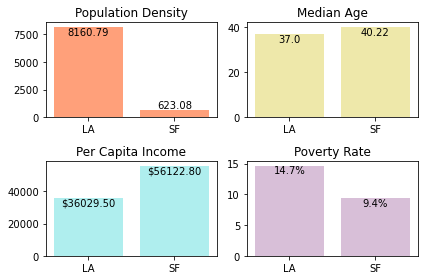

,Name,Population Density,Median Age,Per Capita Income,Poverty Rate
0,Los Angeles Metro Stat Area,8160.787193,37.00,36029.5,14.699326
1,San Francisco Metro Stat Area,623.083090,40.22,56122.8,9.396816


In [5]:
#plot four different variables to compare between the two counties
fig, axs = plt.subplots(2, 2)

axs[0, 0].bar(counties, pop_density, align="center", color="lightsalmon", tick_label=["LA","SF"])
axs[0, 0].set_title("Population Density")
axs[0, 0].text(0, NEW_LASF_census.iloc[0, 1], f"{round(NEW_LASF_census.iloc[0, 1], 2)}", ha="center", va="top")
axs[0, 0].text(1, NEW_LASF_census.iloc[1, 1], f"{round(NEW_LASF_census.iloc[1, 1], 2)}", ha="center", va="bottom")

axs[0, 1].bar(counties, med_age, align="center", color="palegoldenrod", tick_label=["LA","SF"])
axs[0, 1].set_title("Median Age")
axs[0, 1].text(0, NEW_LASF_census.iloc[0, 2], f"{NEW_LASF_census.iloc[0, 2]}", ha="center", va="top")
axs[0, 1].text(1, NEW_LASF_census.iloc[1, 2], f"{NEW_LASF_census.iloc[1, 2]}", ha="center", va="top")

axs[1, 0].bar(counties, income, align="center", color="paleturquoise", tick_label=["LA","SF"])
axs[1, 0].set_title("Per Capita Income")
axs[1, 0].text(0, NEW_LASF_census.iloc[0, 3], f"${NEW_LASF_census.iloc[0, 3]}0", ha="center", va="top")
axs[1, 0].text(1, NEW_LASF_census.iloc[1, 3], f"${NEW_LASF_census.iloc[1, 3]}0", ha="center", va="top")

axs[1, 1].bar(counties, pov_rate, align="center", color="thistle", tick_label=["LA","SF"])
axs[1, 1].set_title("Poverty Rate")
axs[1, 1].text(0, NEW_LASF_census.iloc[0, 4], f"{round(NEW_LASF_census.iloc[0, 4], 2)}%", ha="center", va="top")
axs[1, 1].text(1, NEW_LASF_census.iloc[1, 4], f"{round(NEW_LASF_census.iloc[1, 4], 2)}%", ha="center", va="top")

fig.tight_layout()
plt.savefig("Output_data/NEW_Census_BarGraphs.png", dpi=300)
plt.show()

NEW_LASF_census